https://www.tensorflow.org/tutorials/quickstart/beginner

In [135]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_eager_execution()
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.0


In [136]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [137]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [138]:
x_train.shape

(60000, 28, 28)

In [139]:
y_train.shape

(60000,)

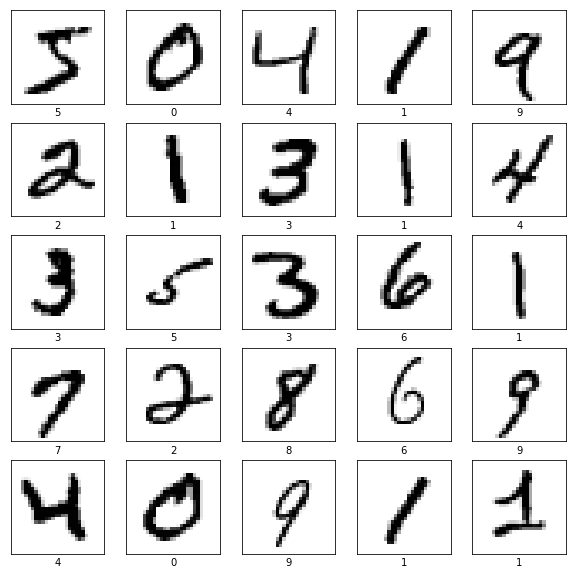

In [140]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [277]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [278]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.05734737, -0.02498492, -0.20771518,  0.0367449 , -0.20667094,
        -0.06181545, -0.09238888, -0.14460461,  0.08505367,  0.02564599]],
      dtype=float32)

In [279]:
tf.nn.softmax(predictions).numpy()

array([[0.11113194, 0.10234873, 0.08525576, 0.10886577, 0.08534483,
        0.09864774, 0.09567738, 0.09080971, 0.11425405, 0.10766416]],
      dtype=float32)

In [280]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [281]:
loss_fn(y_train[:1], predictions).numpy()

2.3162

In [282]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [283]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 781us/step - loss: 0.2467 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 1s 761us/step - loss: 0.1136 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 1s 774us/step - loss: 0.0887 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 1s 770us/step - loss: 0.0702 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 1s 769us/step - loss: 0.0611 - accuracy: 0.9815


In [284]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1104 - accuracy: 0.9715


[0.11044676601886749, 0.9714999794960022]

In [285]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_73 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_74 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_77 (Dense)             (None, 10)              

In [286]:
model.save_weights('digit/ann')

# TEST METHOD

In [141]:
model_new = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [142]:
model_new.load_weights('digit/ann')

In [143]:
probability_model = tf.keras.Sequential([
  model_new,
  tf.keras.layers.Softmax()
])

In [144]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[6.61102791e-13, 3.55088865e-08, 4.95050623e-09, 4.33719229e-08,
        1.93480538e-08, 2.62270392e-12, 4.03901275e-17, 9.99997616e-01,
        3.69437370e-09, 2.37453514e-06],
       [5.51466539e-10, 8.23484392e-09, 9.99999523e-01, 4.21926842e-07,
        3.99315914e-10, 6.49181542e-11, 1.38171011e-11, 1.44542467e-09,
        5.66252434e-10, 8.83227345e-12],
       [1.40879392e-05, 9.91992056e-01, 9.35368880e-04, 4.63129749e-04,
        7.52761494e-04, 5.42024136e-05, 1.09308887e-04, 3.80759104e-03,
        1.46671315e-03, 4.04793711e-04],
       [9.99866843e-01, 3.61376790e-10, 2.22579001e-06, 1.75841901e-08,
        1.63858613e-06, 1.56352073e-07, 8.08116019e-05, 9.18974990e-07,
        1.58927200e-08, 4.72490574e-05],
       [1.79730239e-06, 5.29601402e-06, 1.24933258e-05, 7.65247989e-08,
        9.98280644e-01, 7.64094636e-07, 1.27726535e-05, 1.54259469e-05,
        9.86641226e-06, 1.66089658e-03]], dtype=float32)>

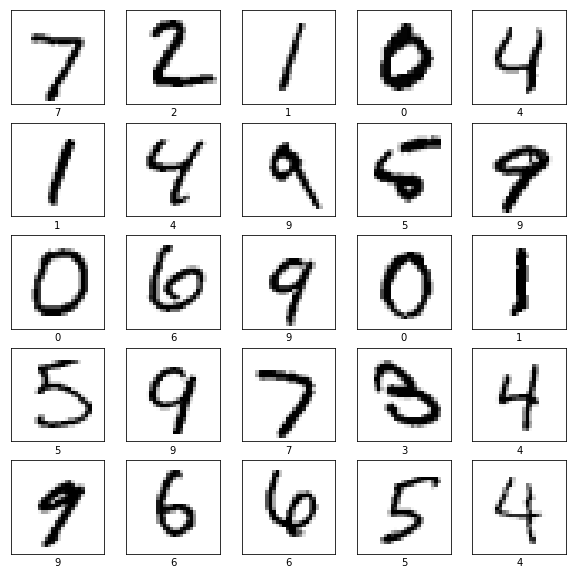

In [145]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [146]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


In [147]:
predictions = probability_model.predict(x_test)

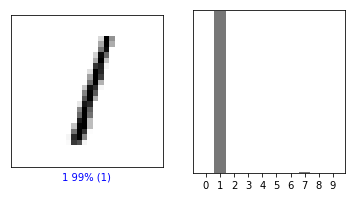

In [148]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

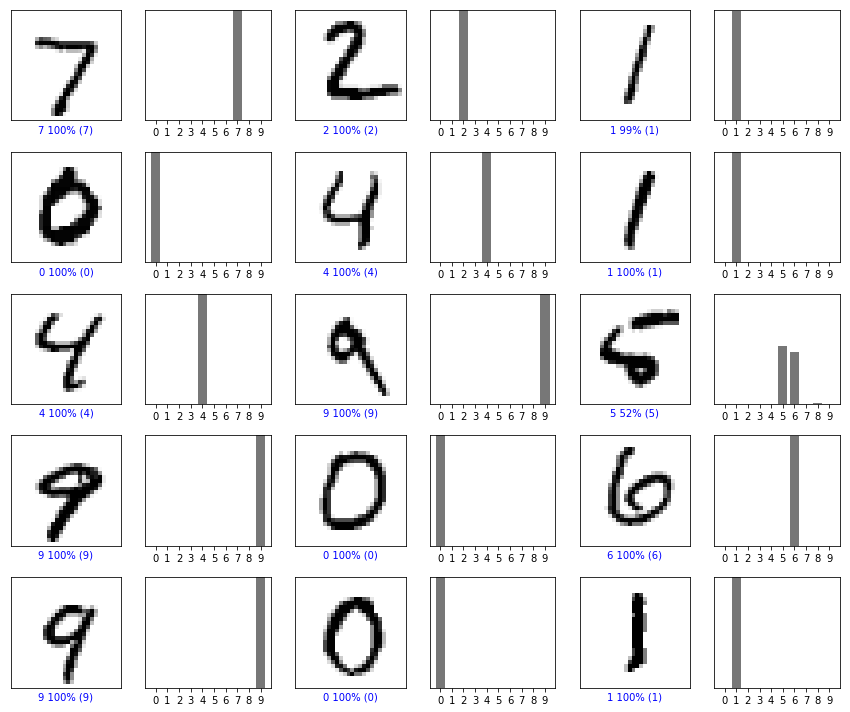

In [149]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()


In [150]:
th =0.000015
th_input = 0.0
input_number = 49
max_num = input_number+1
y_id_test = model_new.predict(x_train[input_number:max_num])
input_layer = np.transpose(x_train[input_number:max_num])
#x_train[input_number:max_num]
input_layer.shape

(28, 28, 1)

In [151]:
input_layer = input_layer.flatten()
input_layer.shape

(784,)

In [152]:
import matplotlib.pyplot as plt
from keras import backend as K
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

inp = model_new.input                                           # input placeholder
outputs = [layer.output for layer in model_new.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
test = x_train[0:1]
layer_outs = [func([test]) for func in functors]

In [153]:
layer_outs[6]

[array([[-4.0146427, -0.9683846, -0.7199553,  3.4698596, -4.746907 ,
          2.616533 , -3.728814 , -1.2584242, -0.9203036, -1.1325088]],
       dtype=float32)]

In [154]:
row = np.arange(0,5,1)
rows = np.arange(0,128,1)
hiden_layer=np.zeros([128, 5],dtype=float)
for i in row:
    arr_layer = np.transpose(np.array(layer_outs[i+1]))
    for q in rows:
        hiden_layer[q,i]=arr_layer[q,0,0]    

In [155]:
arr_layer = np.transpose(np.array(layer_outs[6]))

output_layer= arr_layer[:,0,0]
arr_layer.shape

(10, 1, 1)

In [156]:
model_new.get_weights()[0].shape

(784, 128)

In [157]:
weight_layer=np.zeros([128, 128,5],dtype=float)
weight_layer[:,:,0]=model_new.get_weights()[2]
weight_layer[:,:,1]=model_new.get_weights()[4]
weight_layer[:,:,2]=model_new.get_weights()[6]
weight_layer[:,:,3]=model_new.get_weights()[8]

weight_input = model_new.get_weights()[0]
weight_output = model_new.get_weights()[10]

print(weight_layer[:,:,0]) 

[[-0.1080636   0.01849744 -0.11927507 ... -0.26479486  0.12486833
  -0.23263927]
 [-0.12337452  0.06686134  0.14778057 ... -0.24738924 -0.24786583
  -0.07950529]
 [ 0.01012359  0.04788713 -0.08390974 ...  0.08482023 -0.20430158
  -0.0742731 ]
 ...
 [-0.01266685 -0.10023034 -0.00351926 ...  0.19826831  0.16280606
   0.06799778]
 [-0.20650819  0.0095182  -0.19142634 ... -0.17592596 -0.12709968
   0.02008474]
 [ 0.05845516 -0.01843836 -0.14942136 ... -0.01921963 -0.12748715
   0.01029835]]


In [158]:
Influental_matrix_input_hl1=np.zeros([784, 128],dtype=object)
Influental_matrix_hl1_hl2=np.zeros([128, 128],dtype=object)
Influental_matrix_hl2_hl3=np.zeros([128, 128],dtype=object)
Influental_matrix_hl3_hl4=np.zeros([128, 128],dtype=object)
Influental_matrix_hl4_hl5=np.zeros([128, 128],dtype=object)
Influental_matrix_hl5_output=np.zeros([128, 10],dtype=object)

im_row = np.arange(0,784,1)
im_col = np.arange(0,128,1)
for a in im_row:
    for b in im_col:
        Influental_matrix_input_hl1[a,b]=weight_input[a,b]*input_layer[a]
domi_input_hl1 = sum(abs(Influental_matrix_input_hl1))
Influental_matrix_input_hl1 = Influental_matrix_input_hl1/domi_input_hl1
        
im_row = np.arange(0,128,1)
im_col = np.arange(0,128,1)
for a in im_row:
    for b in im_col:
        Influental_matrix_hl1_hl2[a,b]=weight_layer[a,b,0]*hiden_layer[a,0]
        Influental_matrix_hl2_hl3[a,b]=weight_layer[a,b,1]*hiden_layer[a,1]
        Influental_matrix_hl3_hl4[a,b]=weight_layer[a,b,2]*hiden_layer[a,2]
        Influental_matrix_hl4_hl5[a,b]=weight_layer[a,b,3]*hiden_layer[a,3]
Influental_matrix_hl1_hl2=Influental_matrix_hl1_hl2/sum(abs(Influental_matrix_hl1_hl2))
Influental_matrix_hl2_hl3=Influental_matrix_hl2_hl3/sum(abs(Influental_matrix_hl2_hl3))
Influental_matrix_hl3_hl4=Influental_matrix_hl3_hl4/sum(abs(Influental_matrix_hl3_hl4))
Influental_matrix_hl4_hl5=Influental_matrix_hl4_hl5/sum(abs(Influental_matrix_hl4_hl5))

im_row = np.arange(0,128,1)
im_col = np.arange(0,10,1)
for a in im_row:
    for b in im_col:
        Influental_matrix_hl5_output[a,b]=weight_output[a,b]*hiden_layer[a,4]
Influental_matrix_hl5_output=Influental_matrix_hl5_output/sum(abs(Influental_matrix_hl5_output))
print(Influental_matrix_input_hl1.shape)
print(Influental_matrix_hl1_hl2.shape)
print(Influental_matrix_hl2_hl3.shape)
print(Influental_matrix_hl3_hl4.shape)
print(Influental_matrix_hl4_hl5.shape)
print(Influental_matrix_hl5_output.shape)

(784, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 10)


In [159]:
Influental_matrix_hl5_output

array([[-0.0, 0.0, -0.0, ..., 0.0, 0.0, 0.0],
       [-0.0, -0.0, 0.0, ..., -0.0, -0.0, 0.0],
       [-0.0, -0.0, -0.0, ..., -0.0, -0.0, 0.0],
       ...,
       [-0.009854388546238296, -0.13390697991262476,
        -0.03414131307075164, ..., -0.0823033723501977,
        -0.07192020223125382, -0.12299261194176768],
       [0.0, -0.0, -0.0, ..., -0.0, -0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, -0.0, -0.0]], dtype=object)

In [160]:
influental_matrix_input_h12 = np.matmul(Influental_matrix_input_hl1,Influental_matrix_hl1_hl2)
influental_matrix_input_h13 = np.matmul(influental_matrix_input_h12,Influental_matrix_hl2_hl3)
influental_matrix_input_h14 = np.matmul(influental_matrix_input_h13,Influental_matrix_hl3_hl4)
influental_matrix_input_h15 = np.matmul(influental_matrix_input_h14,Influental_matrix_hl4_hl5)
influental_matrix_input_output = np.matmul(influental_matrix_input_h15,Influental_matrix_hl5_output)
print(Influental_matrix_input_hl1.shape)
print(influental_matrix_input_h12.shape)
print(influental_matrix_input_h13.shape)
print(influental_matrix_input_h14.shape)
print(influental_matrix_input_h15.shape)
print(influental_matrix_input_output.shape)

(784, 128)
(784, 128)
(784, 128)
(784, 128)
(784, 128)
(784, 10)


In [161]:
im_col = np.arange(0,784,1)
for b in im_col:
    influental_matrix_input_output[b,:]=np.mean(influental_matrix_input_output[b,:])

print(influental_matrix_input_output.shape)

(784, 10)


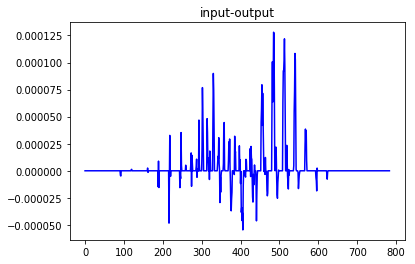

In [162]:
x_label = np.arange(0,784,1)
plt.figure()
plt.subplot(111).set_title("input-output")
plt.plot(x_label, influental_matrix_input_output[:,0], '-b')

In [163]:
influental_matrix_input_output[:] = abs(influental_matrix_input_output[:])

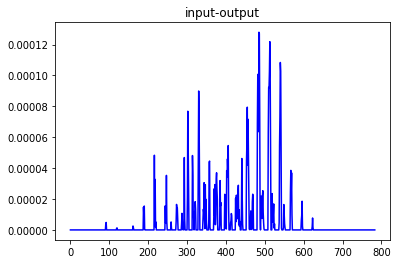

In [164]:
x_label = np.arange(0,784,1)
plt.figure()
plt.subplot(111).set_title("input-output")
plt.plot(x_label, influental_matrix_input_output[:,0], '-b')

In [165]:
input_label= np.arange(0,784,1)
threshold_input=np.zeros([784],dtype=float)
for c in input_label:
    threshold_input[c]=th_input

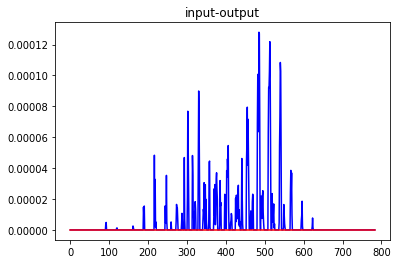

In [166]:
x_label = np.arange(0,784,1)
plt.figure()
plt.subplot(111).set_title("input-output")
plt.plot(x_label, influental_matrix_input_output[:,0], '-b', x_label, threshold_input, '-r')

In [178]:
row = np.arange(0,784,1)
haha=0
print("input_number:",input_number)
print("threshold:", th_input)
print("input_node = 28x28")
print("output_node = 10")
for j in row:
    if(influental_matrix_input_output[j,0]<=threshold_input[j]):
        haha=haha+1
print("non-contributing node from 12 nodes in input:",haha," -> {:5.2f}%".format(haha/784*100))

input_number: 49
threshold: 0.0
input_node = 28x28
output_node = 10
non-contributing node from 12 nodes in input: 600  -> 76.53%


In [180]:
row = np.arange(0,784,1)
hoho=0
print("input_number:",input_number)
print("threshold:", th_input)
print("input_node = 28x28")
print("output_node = 10")
for j in row:
    if(input_layer[j]<=threshold_input[j]):
        hoho=hoho+1
print("non-contributing node from 12 nodes in input:",hoho," -> {:5.2f}%".format(hoho/784*100))

input_number: 49
threshold: 0.0
input_node = 28x28
output_node = 10
non-contributing node from 12 nodes in input: 600  -> 76.53%


In [169]:
Influental_matrix=np.zeros([5, 128],dtype=float)
im_col = np.arange(0,128,1)
for b in im_col:
    Influental_matrix[0,b]=np.mean(Influental_matrix_input_hl1[:,b])
    Influental_matrix[1,b]=np.mean(influental_matrix_input_h12[:,b])
    Influental_matrix[2,b]=np.mean(influental_matrix_input_h13[:,b])
    Influental_matrix[3,b]=np.mean(influental_matrix_input_h14[:,b])
    Influental_matrix[4,b]=np.mean(influental_matrix_input_h15[:,b])  

print(Influental_matrix.shape)

(5, 128)


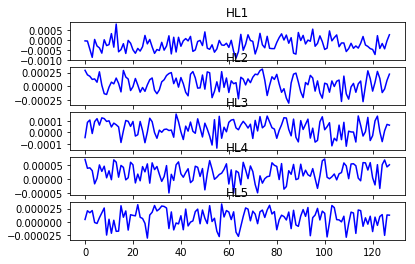

In [170]:
x_label = np.arange(0,128,1)
plt.figure()
plt.subplot(511).set_title("HL1")
plt.plot(x_label, Influental_matrix[0,:], '-b')
plt.subplot(512).set_title("HL2")
plt.plot(x_label, Influental_matrix[1,:], '-b')
plt.subplot(513).set_title("HL3")
plt.plot(x_label, Influental_matrix[2,:], '-b')
plt.subplot(514).set_title("HL4")
plt.plot(x_label, Influental_matrix[3,:], '-b')
plt.subplot(515).set_title("HL5")
plt.plot(x_label, Influental_matrix[4,:], '-b')
plt.show()

In [171]:
haha = np.arange(0,5,1)

for k in haha:
    Influental_matrix[k,:] = abs(Influental_matrix[k,:])

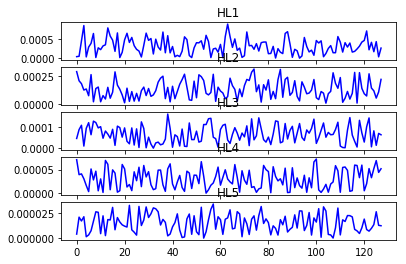

In [172]:
x_label = np.arange(0,128,1)
plt.figure()
plt.subplot(511).set_title("HL1")
plt.plot(x_label, Influental_matrix[0,:], '-b')
plt.subplot(512).set_title("HL2")
plt.plot(x_label, Influental_matrix[1,:], '-b')
plt.subplot(513).set_title("HL3")
plt.plot(x_label, Influental_matrix[2,:], '-b')
plt.subplot(514).set_title("HL4")
plt.plot(x_label, Influental_matrix[3,:], '-b')
plt.subplot(515).set_title("HL5")
plt.plot(x_label, Influental_matrix[4,:], '-b')
plt.show()

In [173]:
x_label = np.arange(0,128,1)
threshold=np.zeros([128],dtype=float)
for k in x_label:
    threshold[k]=th

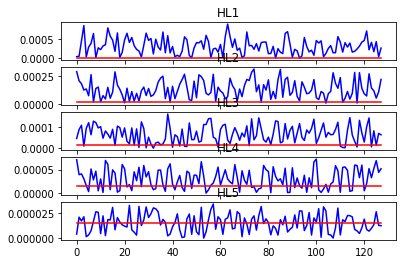

In [174]:
plt.figure()
plt.subplot(511).set_title("HL1")
plt.plot(x_label, Influental_matrix[0,:], '-b', x_label, threshold, '-r')
plt.subplot(512).set_title("HL2")
plt.plot(x_label, Influental_matrix[1,:], '-b', x_label, threshold, '-r')
plt.subplot(513).set_title("HL3")
plt.plot(x_label, Influental_matrix[2,:], '-b', x_label, threshold, '-r')
plt.subplot(514).set_title("HL4")
plt.plot(x_label, Influental_matrix[3,:], '-b', x_label, threshold, '-r')
plt.subplot(515).set_title("HL5")
plt.plot(x_label, Influental_matrix[4,:], '-b', x_label, threshold, '-r')
plt.show()

In [175]:
row = np.arange(0,5,1)
col = np.arange(0,128,1)
node=np.zeros([5],dtype=float)
print("input_number:",input_number)
print("threshold:", th)
print("input_node = 28x28")
print("output_node = 10")
for j in row:
    for l in col:
        if(Influental_matrix[j,l]<=threshold[j]):
            node[j]=node[j]+1
    print("non-contributing node from",l+1,"nodes in HL", j,":",node[j]," -> {:5.2f}%".format(node[j]/128*100))    

input_number: 49
threshold: 1.5e-05
input_node = 28x28
output_node = 10
non-contributing node from 128 nodes in HL 0 : 5.0  ->  3.91%
non-contributing node from 128 nodes in HL 1 : 4.0  ->  3.12%
non-contributing node from 128 nodes in HL 2 : 17.0  -> 13.28%
non-contributing node from 128 nodes in HL 3 : 39.0  -> 30.47%
non-contributing node from 128 nodes in HL 4 : 63.0  -> 49.22%
